# Differential Equations - ODE Solvers
- **Purpose**: Solve ordinary differential equations (ODEs) numerically
- **scipy.integrate**: solve_ivp (initial value problems), boundary value problems
- **Applications**: Physics simulations, population dynamics, chemical reactions, control systems

Key topics:
- **Initial Value Problems (IVP)**: solve_ivp with multiple methods
- **Systems of ODEs**: Coupled equations
- **Events**: Detect when conditions are met
- **Stiff equations**: Implicit methods

Real examples:
- Radioactive decay
- Spring-mass-damper systems
- Predator-prey dynamics (Lotka-Volterra)
- Pendulum motion
- SIR epidemic model

In [1]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

# Set print and plot options
np.set_printoptions(precision=6, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("ODE solver module loaded")

ODE solver module loaded


## Ordinary Differential Equations (ODEs)

An ODE relates a function to its derivatives:

\[ \frac{dy}{dt} = f(t, y) \]

**Initial Value Problem (IVP)**:
- Given: y'(t) = f(t, y), y(t₀) = y₀
- Find: y(t) for t > t₀

**Order**:
- **1st order**: y' = f(t, y)
- **2nd order**: y'' = f(t, y, y') → convert to system of 1st order

**Types**:
- **Linear**: y' = ay + b
- **Nonlinear**: y' = y²
- **System**: y₁' = f₁(t, y₁, y₂), y₂' = f₂(t, y₁, y₂)

## solve_ivp() - Modern ODE Solver

**Function**: 
```python
scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', 
                          t_eval=None, events=None)
```

**Parameters**:
- `fun(t, y)`: RHS of dy/dt = fun(t, y)
- `t_span`: Tuple (t0, tf) - start and end times
- `y0`: Initial condition (array)
- `method`: 'RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA'
- `t_eval`: Specific times to evaluate solution
- `events`: Functions to detect events

**Returns**: Bunch object with `.t` (times) and `.y` (solutions)

**Methods**:
- **RK45**: Explicit Runge-Kutta (default, good general purpose)
- **BDF**: Implicit, for stiff equations
- **Radau**: Implicit, for stiff equations
- **LSODA**: Automatic stiffness detection

## Example 1: Exponential Decay (Radioactive)

**Radioactive decay**: Rate proportional to amount present

\[ \frac{dN}{dt} = -\lambda N \]

Where:
- N(t) = number of atoms at time t
- λ = decay constant

**Analytical solution**: N(t) = N₀e^(-λt)

**Half-life**: t₁/₂ = ln(2)/λ

Radioactive Decay Simulation
  Initial amount N₀: 1000
  Decay constant λ: 0.1
  Half-life: 6.93 time units

At t=10: N(10) = 364.37
Expected: 367.88


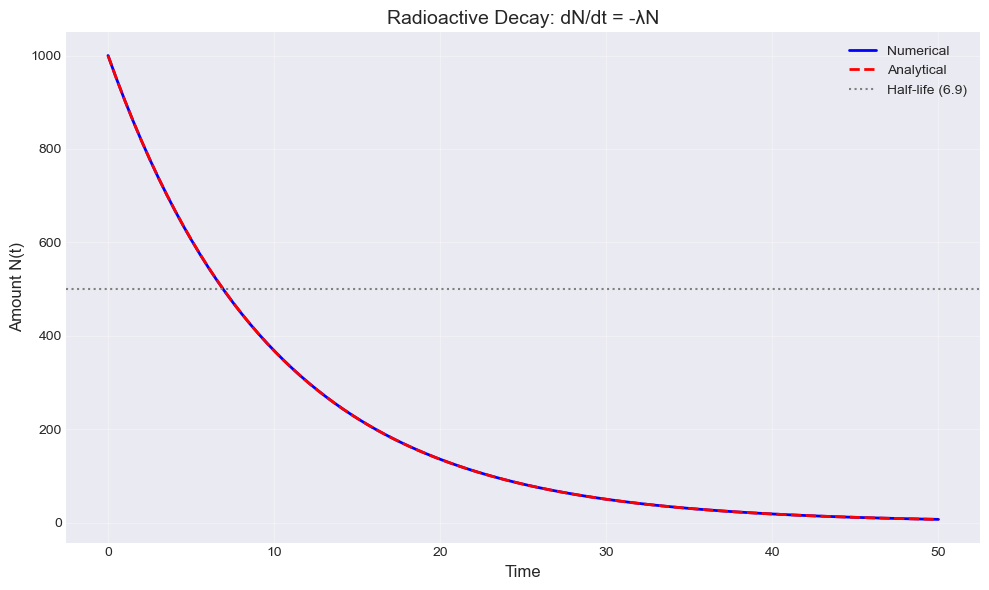


Maximum error: 4.13e-01


In [2]:
# Radioactive decay: dN/dt = -λN
def decay(t, y, lam):
    return -lam * y

# Parameters
N0 = 1000  # initial amount
lam = 0.1  # decay constant (1/time)
t_span = (0, 50)
t_eval = np.linspace(0, 50, 100)

# Solve ODE
sol = solve_ivp(decay, t_span, [N0], t_eval=t_eval, args=(lam,))

# Analytical solution
N_analytical = N0 * np.exp(-lam * sol.t)

print("Radioactive Decay Simulation")
print(f"  Initial amount N₀: {N0}")
print(f"  Decay constant λ: {lam}")
print(f"  Half-life: {np.log(2)/lam:.2f} time units")
print(f"\nAt t=10: N(10) = {sol.y[0][np.argmin(np.abs(sol.t - 10))]:.2f}")
print(f"Expected: {N0 * np.exp(-lam*10):.2f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'b-', linewidth=2, label='Numerical')
plt.plot(sol.t, N_analytical, 'r--', linewidth=2, label='Analytical')
plt.axhline(N0/2, color='gray', linestyle=':', label=f'Half-life ({np.log(2)/lam:.1f})')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amount N(t)', fontsize=12)
plt.title('Radioactive Decay: dN/dt = -λN', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Error analysis
max_error = np.max(np.abs(sol.y[0] - N_analytical))
print(f"\nMaximum error: {max_error:.2e}")

## Example 2: Logistic Growth (Population)

**Logistic equation**: Growth with carrying capacity

\[ \frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right) \]

Where:
- P(t) = population at time t
- r = growth rate
- K = carrying capacity (maximum sustainable population)

**Behavior**:
- When P << K: exponential growth (dP/dt ≈ rP)
- When P ≈ K: growth slows
- P → K as t → ∞

**Applications**: Bacteria growth, tumor growth, viral spread

Logistic Population Growth
  Initial population P₀: 10
  Growth rate r: 0.5
  Carrying capacity K: 1000

Population at t=10: 594.4
Final population (t=20): 995.5
Approaches K = 1000


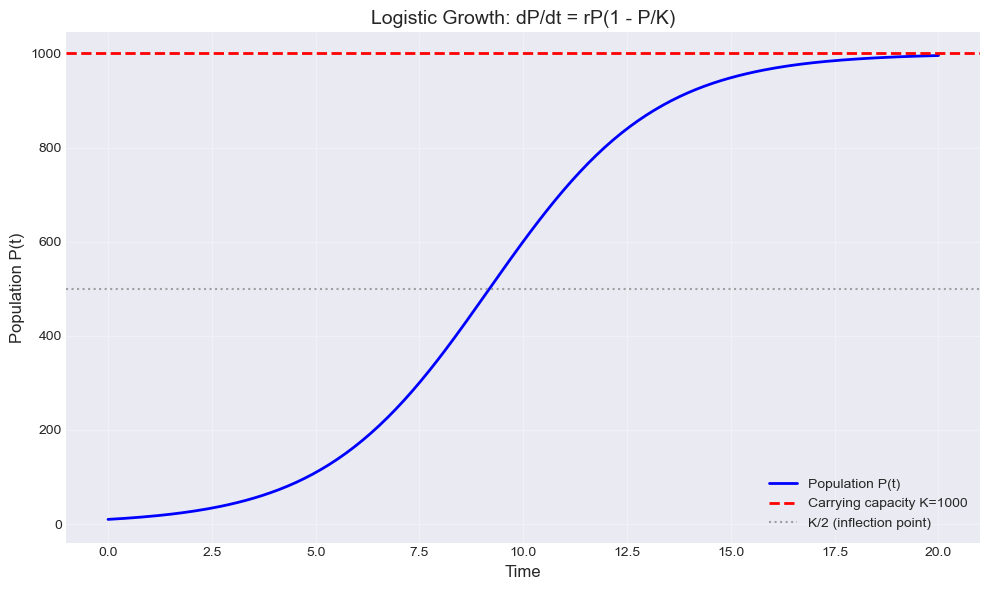

In [3]:
# Logistic growth: dP/dt = rP(1 - P/K)
def logistic(t, y, r, K):
    P = y[0]
    dPdt = r * P * (1 - P/K)
    return [dPdt]

# Parameters
P0 = 10  # initial population
r = 0.5  # growth rate
K = 1000  # carrying capacity
t_span = (0, 20)
t_eval = np.linspace(0, 20, 200)

# Solve
sol = solve_ivp(logistic, t_span, [P0], t_eval=t_eval, args=(r, K))

print("Logistic Population Growth")
print(f"  Initial population P₀: {P0}")
print(f"  Growth rate r: {r}")
print(f"  Carrying capacity K: {K}")
print(f"\nPopulation at t=10: {sol.y[0][np.argmin(np.abs(sol.t - 10))]:.1f}")
print(f"Final population (t=20): {sol.y[0][-1]:.1f}")
print(f"Approaches K = {K}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'b-', linewidth=2, label='Population P(t)')
plt.axhline(K, color='r', linestyle='--', linewidth=2, label=f'Carrying capacity K={K}')
plt.axhline(K/2, color='gray', linestyle=':', alpha=0.7, label='K/2 (inflection point)')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Population P(t)', fontsize=12)
plt.title('Logistic Growth: dP/dt = rP(1 - P/K)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Second-Order ODE: Spring-Mass-Damper

**Damped harmonic oscillator**:

\[ m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = 0 \]

Where:
- m = mass
- c = damping coefficient
- k = spring constant
- x = displacement

**Convert to first-order system**:
Let v = dx/dt, then:
- dx/dt = v
- dv/dt = -(c/m)v - (k/m)x

**Types of damping**:
- **Underdamped** (c² < 4mk): Oscillates with decay
- **Critically damped** (c² = 4mk): Fastest return to equilibrium
- **Overdamped** (c² > 4mk): Slow return, no oscillation

Spring-Mass-Damper System
  Mass m = 1.0 kg
  Spring constant k = 10.0 N/m
  Initial displacement x₀ = 1.0 m

Damping cases:
  Underdamped: c = 1.0 (c² < 4mk = 40.0)
  Critical: c = 6.32 (c² = 4mk)
  Overdamped: c = 8.0 (c² > 4mk)


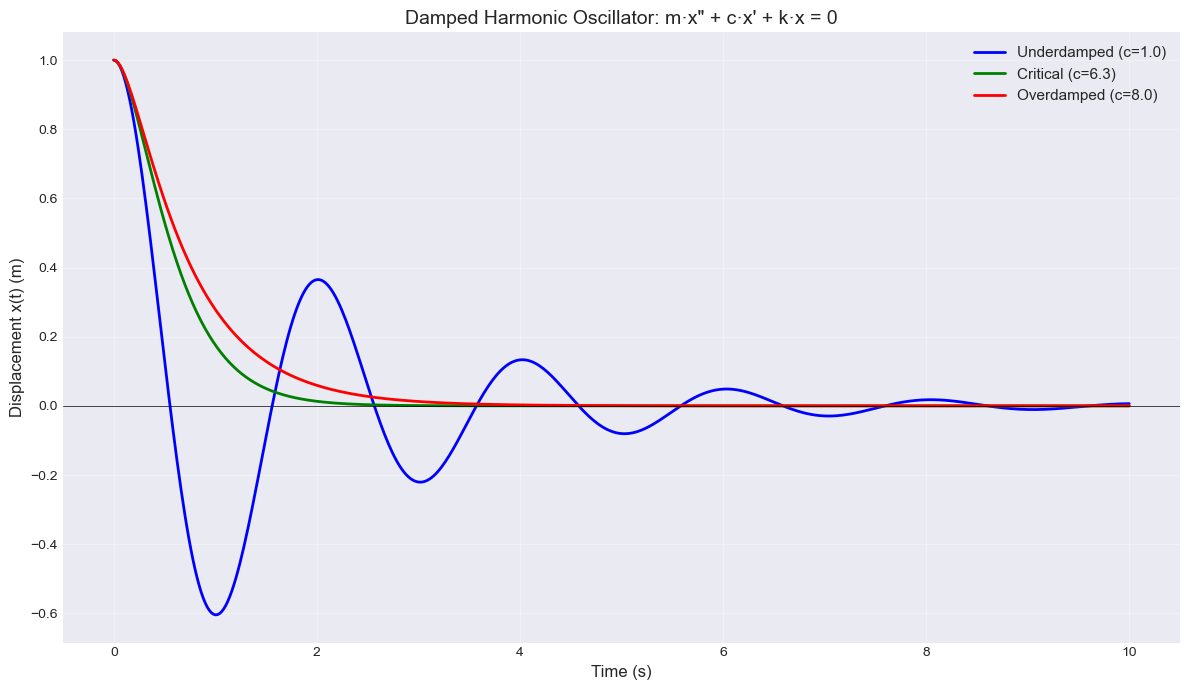

In [4]:
# Spring-mass-damper system
def spring_mass_damper(t, y, m, c, k):
    x, v = y
    dxdt = v
    dvdt = -(c/m)*v - (k/m)*x
    return [dxdt, dvdt]

# Parameters
m = 1.0   # mass (kg)
k = 10.0  # spring constant (N/m)
x0 = 1.0  # initial displacement (m)
v0 = 0.0  # initial velocity (m/s)

t_span = (0, 10)
t_eval = np.linspace(0, 10, 500)

# Three damping cases
c_under = 1.0      # underdamped
c_critical = 2*np.sqrt(k*m)  # critically damped
c_over = 8.0       # overdamped

# Solve for each case
sol_under = solve_ivp(spring_mass_damper, t_span, [x0, v0], 
                      t_eval=t_eval, args=(m, c_under, k))
sol_critical = solve_ivp(spring_mass_damper, t_span, [x0, v0], 
                         t_eval=t_eval, args=(m, c_critical, k))
sol_over = solve_ivp(spring_mass_damper, t_span, [x0, v0], 
                     t_eval=t_eval, args=(m, c_over, k))

print("Spring-Mass-Damper System")
print(f"  Mass m = {m} kg")
print(f"  Spring constant k = {k} N/m")
print(f"  Initial displacement x₀ = {x0} m")
print(f"\nDamping cases:")
print(f"  Underdamped: c = {c_under} (c² < 4mk = {4*m*k})")
print(f"  Critical: c = {c_critical:.2f} (c² = 4mk)")
print(f"  Overdamped: c = {c_over} (c² > 4mk)")

# Plot
plt.figure(figsize=(12, 7))
plt.plot(sol_under.t, sol_under.y[0], 'b-', linewidth=2, label=f'Underdamped (c={c_under})')
plt.plot(sol_critical.t, sol_critical.y[0], 'g-', linewidth=2, label=f'Critical (c={c_critical:.1f})')
plt.plot(sol_over.t, sol_over.y[0], 'r-', linewidth=2, label=f'Overdamped (c={c_over})')
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Displacement x(t) (m)', fontsize=12)
plt.title('Damped Harmonic Oscillator: m·x" + c·x\' + k·x = 0', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Example: Nonlinear Pendulum

**Equation of motion**:

\[ \frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) = 0 \]

Where:
- θ = angle from vertical
- L = length of pendulum
- g = gravitational acceleration

**Small angle approximation**: sin(θ) ≈ θ gives simple harmonic motion

**Large angles**: Nonlinear behavior, period depends on amplitude

**First-order system**:
- dθ/dt = ω
- dω/dt = -(g/L)sin(θ)

Nonlinear Pendulum
  Length L = 1.0 m
  Gravity g = 9.81 m/s²

Small angle approximation period: 2.006 s

Case 1: θ₀ = 10° (small angle)
Case 2: θ₀ = 170° (large angle)


/var/folders/d1/sfvddbbx4tg14yxq7trqmhyw0000gn/T/ipykernel_2825/463266695.py:59: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


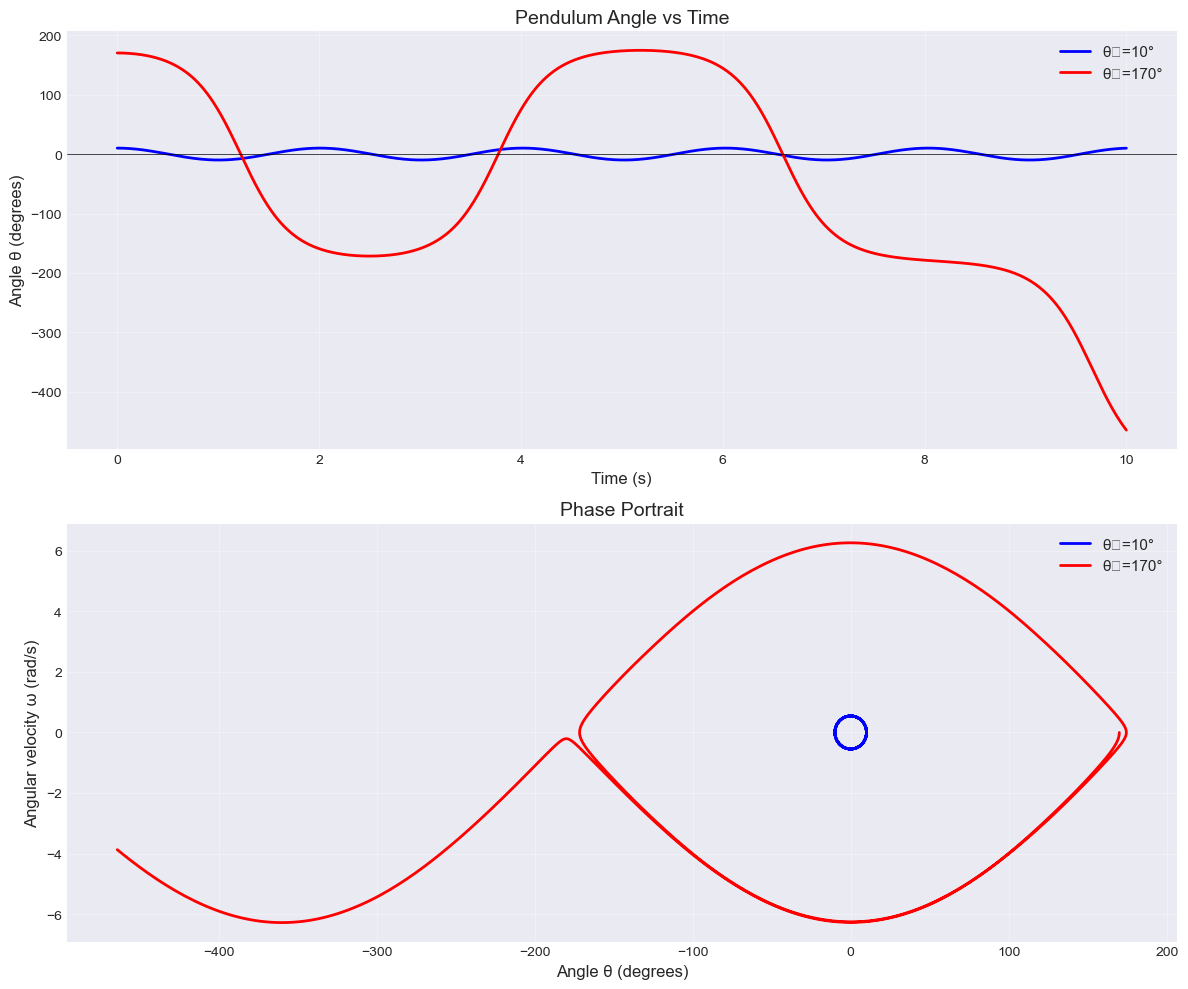

In [5]:
# Nonlinear pendulum
def pendulum(t, y, g, L):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Parameters
g = 9.81  # gravity (m/s²)
L = 1.0   # length (m)
omega0 = 0.0  # initial angular velocity

t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Different initial angles
theta_small = np.radians(10)   # 10 degrees
theta_large = np.radians(170)  # 170 degrees (nearly inverted)

# Solve
sol_small = solve_ivp(pendulum, t_span, [theta_small, omega0], 
                      t_eval=t_eval, args=(g, L))
sol_large = solve_ivp(pendulum, t_span, [theta_large, omega0], 
                      t_eval=t_eval, args=(g, L))

print("Nonlinear Pendulum")
print(f"  Length L = {L} m")
print(f"  Gravity g = {g} m/s²")
print(f"\nSmall angle approximation period: {2*np.pi*np.sqrt(L/g):.3f} s")
print(f"\nCase 1: θ₀ = {np.degrees(theta_small):.0f}° (small angle)")
print(f"Case 2: θ₀ = {np.degrees(theta_large):.0f}° (large angle)")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Angle vs time
axes[0].plot(sol_small.t, np.degrees(sol_small.y[0]), 'b-', 
             linewidth=2, label=f'θ₀={np.degrees(theta_small):.0f}°')
axes[0].plot(sol_large.t, np.degrees(sol_large.y[0]), 'r-', 
             linewidth=2, label=f'θ₀={np.degrees(theta_large):.0f}°')
axes[0].axhline(0, color='black', linestyle='-', linewidth=0.5)
axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Angle θ (degrees)', fontsize=12)
axes[0].set_title('Pendulum Angle vs Time', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Phase portrait
axes[1].plot(np.degrees(sol_small.y[0]), sol_small.y[1], 'b-', 
             linewidth=2, label=f'θ₀={np.degrees(theta_small):.0f}°')
axes[1].plot(np.degrees(sol_large.y[0]), sol_large.y[1], 'r-', 
             linewidth=2, label=f'θ₀={np.degrees(theta_large):.0f}°')
axes[1].set_xlabel('Angle θ (degrees)', fontsize=12)
axes[1].set_ylabel('Angular velocity ω (rad/s)', fontsize=12)
axes[1].set_title('Phase Portrait', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## System of ODEs: Lotka-Volterra (Predator-Prey)

**Ecological model** for predator-prey interactions:

\[ \frac{dx}{dt} = \alpha x - \beta xy \]
\[ \frac{dy}{dt} = \delta xy - \gamma y \]

Where:
- x = prey population (e.g., rabbits)
- y = predator population (e.g., foxes)
- α = prey growth rate
- β = predation rate
- γ = predator death rate
- δ = predator efficiency

**Dynamics**:
1. Prey increase → predators have more food → predators increase
2. More predators → more prey eaten → prey decrease
3. Prey scarce → predators starve → predators decrease
4. Fewer predators → prey recover → cycle repeats

**Result**: Oscillating populations (out of phase)

Lotka-Volterra Predator-Prey Model

Parameters:
  α (prey growth) = 1.0
  β (predation) = 0.1
  γ (predator death) = 1.5
  δ (predator efficiency) = 0.075

Initial populations:
  Prey (rabbits) = 10
  Predators (foxes) = 5


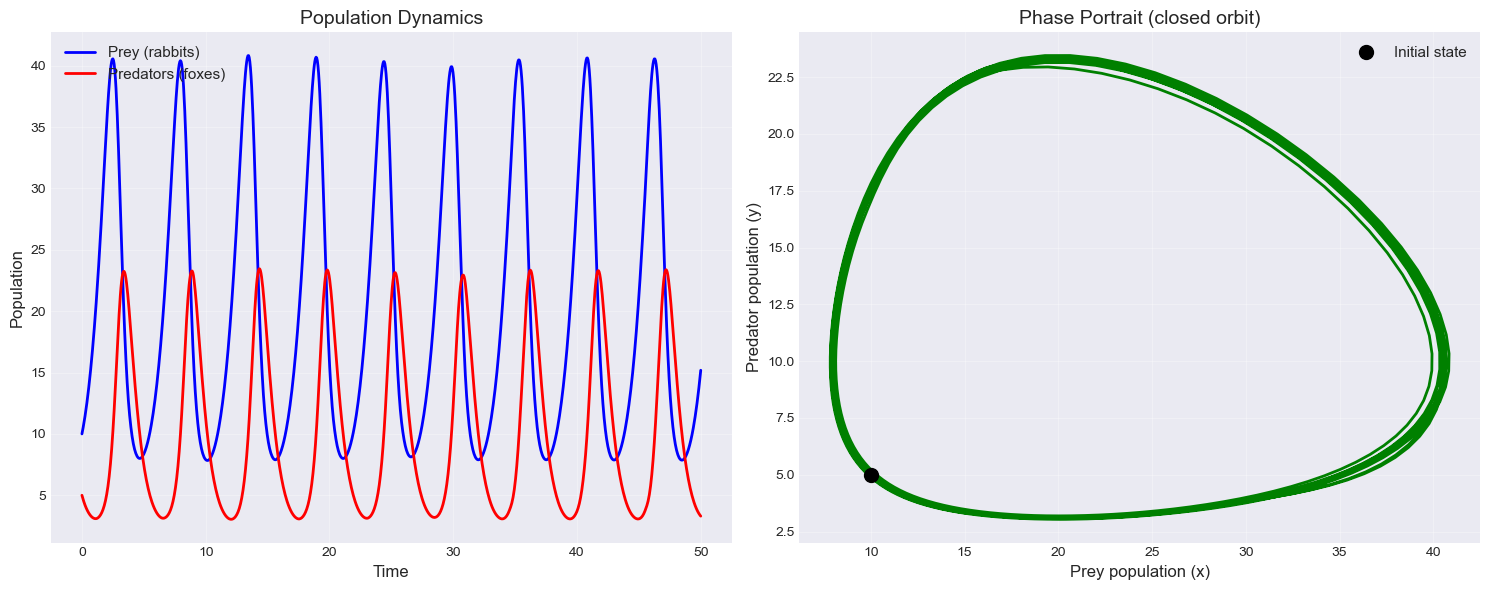


Observation: Populations oscillate with predators lagging prey!


In [6]:
# Lotka-Volterra predator-prey model
def lotka_volterra(t, y, alpha, beta, gamma, delta):
    x, y_pop = y  # x=prey, y_pop=predator
    dxdt = alpha*x - beta*x*y_pop
    dydt = delta*x*y_pop - gamma*y_pop
    return [dxdt, dydt]

# Parameters (classic values)
alpha = 1.0   # prey growth rate
beta = 0.1    # predation rate
gamma = 1.5   # predator death rate
delta = 0.075 # predator efficiency

# Initial populations
x0 = 10  # initial prey
y0 = 5   # initial predators

t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# Solve
sol = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval,
                args=(alpha, beta, gamma, delta))

print("Lotka-Volterra Predator-Prey Model")
print(f"\nParameters:")
print(f"  α (prey growth) = {alpha}")
print(f"  β (predation) = {beta}")
print(f"  γ (predator death) = {gamma}")
print(f"  δ (predator efficiency) = {delta}")
print(f"\nInitial populations:")
print(f"  Prey (rabbits) = {x0}")
print(f"  Predators (foxes) = {y0}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Time series
axes[0].plot(sol.t, sol.y[0], 'b-', linewidth=2, label='Prey (rabbits)')
axes[0].plot(sol.t, sol.y[1], 'r-', linewidth=2, label='Predators (foxes)')
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Population', fontsize=12)
axes[0].set_title('Population Dynamics', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Phase portrait
axes[1].plot(sol.y[0], sol.y[1], 'g-', linewidth=2)
axes[1].plot(x0, y0, 'ko', markersize=10, label='Initial state')
axes[1].set_xlabel('Prey population (x)', fontsize=12)
axes[1].set_ylabel('Predator population (y)', fontsize=12)
axes[1].set_title('Phase Portrait (closed orbit)', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservation: Populations oscillate with predators lagging prey!")

## SIR Epidemic Model

**Compartmental model** for disease spread:

\[ \frac{dS}{dt} = -\beta SI \]
\[ \frac{dI}{dt} = \beta SI - \gamma I \]
\[ \frac{dR}{dt} = \gamma I \]

Where:
- S = Susceptible (can be infected)
- I = Infected (contagious)
- R = Recovered (immune)
- β = transmission rate
- γ = recovery rate

**Conservation**: S + I + R = N (total population)

**Basic reproduction number**: R₀ = β/γ
- R₀ > 1: epidemic occurs
- R₀ < 1: disease dies out

**Application**: COVID-19, flu, measles modeling

SIR Epidemic Model

Parameters:
  Total population N = 1000
  Transmission rate β = 0.5
  Recovery rate γ = 0.1
  Basic reproduction number R₀ = 5.0
  Average infectious period = 10.0 days

Peak infection:
  Time: day 21.2
  Number infected: 478 (47.8% of population)

Final state (day 160):
  Susceptible: 7
  Infected: 0
  Recovered: 993
  Total affected: 993 (99.3%)


/var/folders/d1/sfvddbbx4tg14yxq7trqmhyw0000gn/T/ipykernel_2825/3478021032.py:61: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()


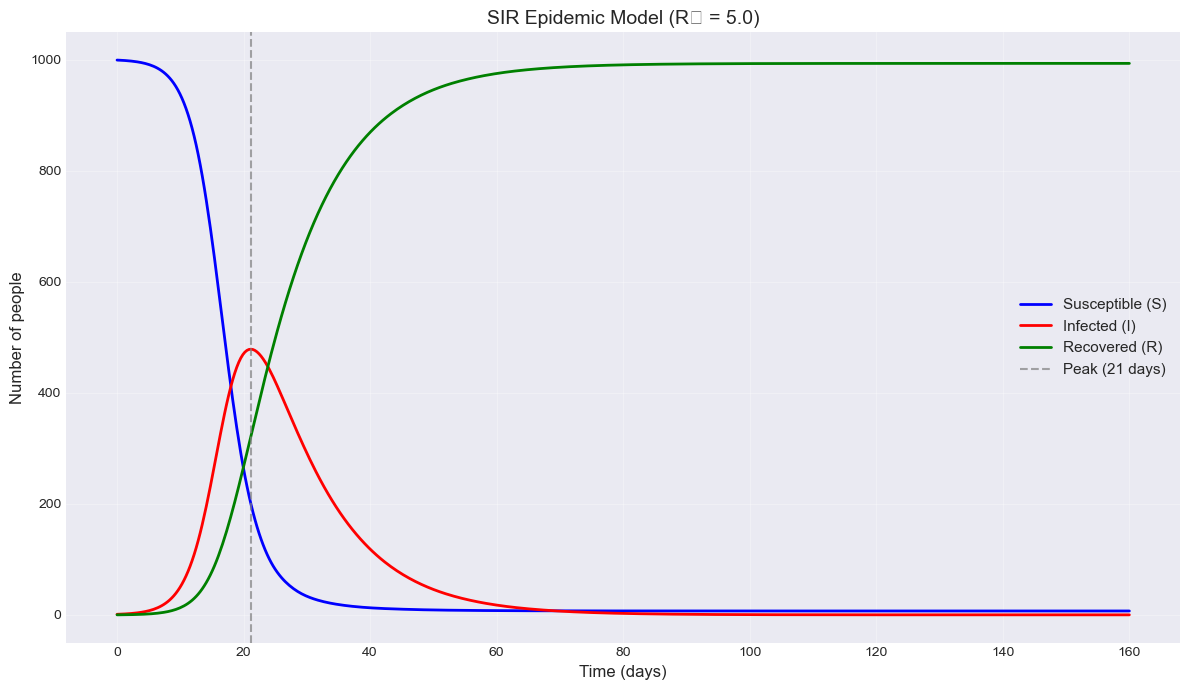

In [7]:
# SIR epidemic model
def sir_model(t, y, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Parameters
N = 1000      # total population
I0 = 1        # initial infected
R0_val = 0    # initial recovered
S0 = N - I0 - R0_val  # initial susceptible

beta = 0.5    # transmission rate (contacts per day × probability)
gamma = 0.1   # recovery rate (1/infectious period)

R0_number = beta / gamma  # Basic reproduction number

t_span = (0, 160)
t_eval = np.linspace(0, 160, 500)

# Solve
sol = solve_ivp(sir_model, t_span, [S0, I0, R0_val], t_eval=t_eval,
                args=(beta, gamma, N))

print("SIR Epidemic Model")
print(f"\nParameters:")
print(f"  Total population N = {N}")
print(f"  Transmission rate β = {beta}")
print(f"  Recovery rate γ = {gamma}")
print(f"  Basic reproduction number R₀ = {R0_number:.1f}")
print(f"  Average infectious period = {1/gamma:.1f} days")

# Find peak
peak_idx = np.argmax(sol.y[1])
peak_time = sol.t[peak_idx]
peak_infected = sol.y[1][peak_idx]

print(f"\nPeak infection:")
print(f"  Time: day {peak_time:.1f}")
print(f"  Number infected: {peak_infected:.0f} ({peak_infected/N*100:.1f}% of population)")
print(f"\nFinal state (day {t_span[1]}):")
print(f"  Susceptible: {sol.y[0][-1]:.0f}")
print(f"  Infected: {sol.y[1][-1]:.0f}")
print(f"  Recovered: {sol.y[2][-1]:.0f}")
print(f"  Total affected: {sol.y[2][-1]:.0f} ({sol.y[2][-1]/N*100:.1f}%)")

# Plot
plt.figure(figsize=(12, 7))
plt.plot(sol.t, sol.y[0], 'b-', linewidth=2, label='Susceptible (S)')
plt.plot(sol.t, sol.y[1], 'r-', linewidth=2, label='Infected (I)')
plt.plot(sol.t, sol.y[2], 'g-', linewidth=2, label='Recovered (R)')
plt.axvline(peak_time, color='gray', linestyle='--', alpha=0.7, 
            label=f'Peak ({peak_time:.0f} days)')
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title(f'SIR Epidemic Model (R₀ = {R0_number:.1f})', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Event Detection

Stop integration when a condition is met:

```python
def event(t, y):
    return y[0] - threshold  # event when this equals zero

event.terminal = True  # stop integration
event.direction = -1   # only detect decreasing crossing
```

**Applications**:
- Ball hitting ground (position = 0)
- Population extinction (N < threshold)
- Chemical reaction completion
- Circuit switching

Bouncing Ball with Event Detection

Initial conditions:
  Height h₀ = 10.0 m
  Velocity v₀ = 0.0 m/s
  Gravity g = 9.81 m/s²

Impact detected!
  Time: 1.428 s
  Velocity: -14.007 m/s

Theoretical:
  Time: 1.428 s
  Velocity: -14.007 m/s


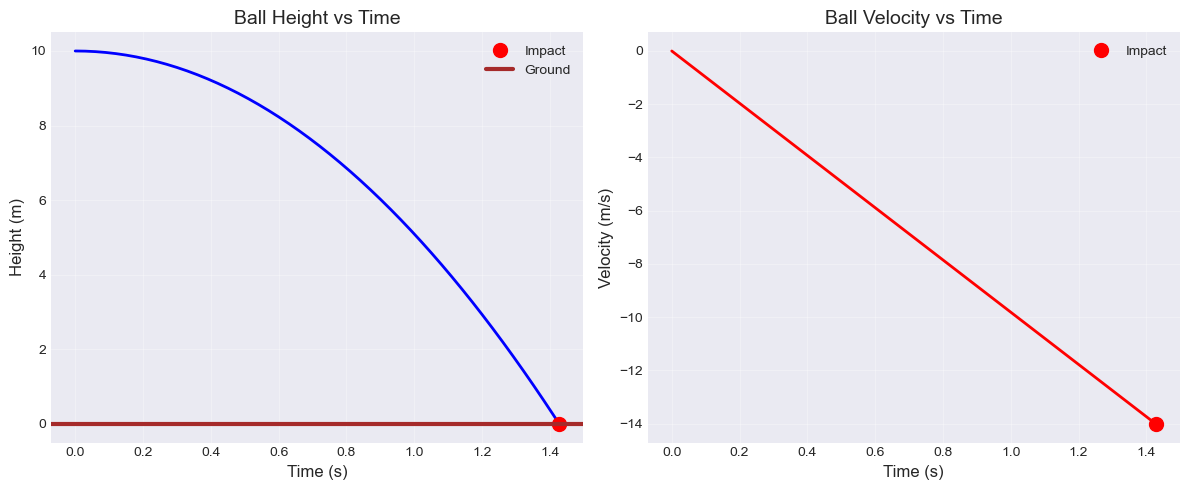

In [8]:
# Bouncing ball with event detection
def bouncing_ball(t, y, g):
    h, v = y  # height, velocity
    dhdt = v
    dvdt = -g
    return [dhdt, dvdt]

# Event: ball hits ground
def hit_ground(t, y, g):
    return y[0]  # height = 0

hit_ground.terminal = True  # stop when event occurs
hit_ground.direction = -1   # only when falling (h decreasing)

# Parameters
g = 9.81  # gravity
h0 = 10.0  # initial height (m)
v0 = 0.0   # initial velocity (m/s)

t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Solve
sol = solve_ivp(bouncing_ball, t_span, [h0, v0], t_eval=t_eval,
                events=hit_ground, args=(g,), dense_output=True)

print("Bouncing Ball with Event Detection")
print(f"\nInitial conditions:")
print(f"  Height h₀ = {h0} m")
print(f"  Velocity v₀ = {v0} m/s")
print(f"  Gravity g = {g} m/s²")

if len(sol.t_events[0]) > 0:
    impact_time = sol.t_events[0][0]
    impact_velocity = sol.sol(impact_time)[1]
    print(f"\nImpact detected!")
    print(f"  Time: {impact_time:.3f} s")
    print(f"  Velocity: {impact_velocity:.3f} m/s")
    
    # Theoretical values
    t_theory = np.sqrt(2*h0/g)
    v_theory = -g*t_theory
    print(f"\nTheoretical:")
    print(f"  Time: {t_theory:.3f} s")
    print(f"  Velocity: {v_theory:.3f} m/s")

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], 'b-', linewidth=2)
if len(sol.t_events[0]) > 0:
    plt.plot(sol.t_events[0][0], 0, 'ro', markersize=10, label='Impact')
plt.axhline(0, color='brown', linestyle='-', linewidth=3, label='Ground')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Height (m)', fontsize=12)
plt.title('Ball Height vs Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], 'r-', linewidth=2)
if len(sol.t_events[0]) > 0:
    plt.plot(sol.t_events[0][0], sol.sol(sol.t_events[0][0])[1], 
             'ro', markersize=10, label='Impact')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Velocity (m/s)', fontsize=12)
plt.title('Ball Velocity vs Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary: ODE Solvers

### Main Function:

```python
scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', 
                          t_eval=None, events=None, args=())
```

### Methods:

| Method | Type | Best For | Order |
|--------|------|----------|-------|
| RK45 | Explicit | Non-stiff, general purpose | 4-5 |
| RK23 | Explicit | Low accuracy needs | 2-3 |
| DOP853 | Explicit | High accuracy | 8 |
| Radau | Implicit | Stiff equations | 5 |
| BDF | Implicit | Stiff equations | 1-5 |
| LSODA | Auto | Automatic stiffness detection | varies |

### Converting Higher-Order ODEs:

**Second-order**: y'' = f(t, y, y')

→ Let v = y', then:
- dy/dt = v
- dv/dt = f(t, y, v)

### Event Detection:

```python
def event_func(t, y):
    return condition(y)  # zero crossing

event_func.terminal = True  # stop integration
event_func.direction = -1   # -1, 0, or 1
```

### Applications Covered:
✓ Radioactive decay (exponential)
✓ Population growth (logistic)
✓ Spring-mass-damper (second-order)
✓ Pendulum (nonlinear)
✓ Predator-prey (system)
✓ SIR epidemic (system)
✓ Event detection (bouncing ball)

## Practice Problems

1. **RC Circuit**: Solve dV/dt = -(1/RC)V with V(0)=10V, R=1kΩ, C=1μF

2. **Projectile**: 2D motion with air resistance: 
   - dv_x/dt = -kv_x
   - dv_y/dt = -g - kv_y

3. **Chemical reaction**: A → B with dA/dt = -kA, dB/dt = kA

4. **Van der Pol oscillator**: x'' - μ(1-x²)x' + x = 0 (nonlinear)

5. **SEIR model**: Add Exposed compartment to SIR model